In [1]:
import numpy as np
import os
import sys
import random
import torch
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path+"/models")
sys.path.append(module_path+"/train")
sys.path.append(module_path+"/datasets")

from factor_vae import FactorVAEDSprites, Discriminator
from datasets import train_test_random_split, load_dsprites, CustomDSpritesDatasetFactorVAE
from train import train_factor_vae, test_factor_vae
from entanglement_metric import entanglement_metric_factor_vae, entanglement_metric_beta_vae
from utils import latent_transversal
from beta_vae import Classifier

In [2]:
dataset = load_dsprites("../datasets/dsprites.npz",False)

In [3]:
data_size = 10000
data_ = CustomDSpritesDatasetFactorVAE(dataset,data_size)

In [8]:
def plot_loss(loss_list, title):
    plt.plot(np.arange(1,len(loss_list)+1, 1), loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training "+title)
    plt.show()

In [4]:
model1 = torch.load('trained_models/betavae_beta1_e40_alldata.dat', map_location=torch.device('cpu'))
model2 = torch.load('trained_models/betavae_beta4_e40_alldata.dat', map_location=torch.device('cpu'))
model3 = torch.load('trained_models/controlvae_e50_lr1e2_Cmax12.dat', map_location=torch.device('cpu'))
model4 = torch.load('trained_models/controlvae_epoch50_lr1e2_Cmax10.dat', map_location=torch.device('cpu'))
model5 = torch.load('trained_models/controlvae_epoch50_lr1e2_Cmax8.dat', map_location=torch.device('cpu'))

In [5]:
def plot_loss(loss_list, title):
    plt.plot(np.arange(1,len(loss_list)+1, 1), loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training "+title)
    plt.show()

model 1
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 12.  1.  2.  1.  3.  0.  1.  1.  4.]
 [ 0.  0.  2.  0. 16.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  4.  0.  2.  1.  2.  0.  4.]
 [ 0.  0.  7.  0.  0.  0.  5.  2.  0. 10.]
 [18.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
Factor Vae metric: 
Accuracy: 0.6
Beta Vae metric: 
Epoch 0 finished, loss: 1.6099197506904601, accuracy:0.19875
Epoch 1 finished, loss: 1.6081488117575646, accuracy:0.19875
Epoch 2 finished, loss: 1.6062589198350907, accuracy:0.20125
Epoch 3 finished, loss: 1.6039792433381082, accuracy:0.2125
Epoch 4 finished, loss: 1.6008223369717598, accuracy:0.2775
Epoch 5 finished, loss: 1.5973987117409707, accuracy:0.285
Epoch 6 finished, loss: 1.5939998745918273, accuracy:0.28125
Epoch 7 finished, loss: 1.5900586694478989, accuracy:0.295
Epoch 8 finished, loss: 1.5859460160136223, accuracy:0.285
Epoch 9 finished, loss: 1.5813634023070335, accuracy:0.29
Epoch 10 finished, loss: 1.5767398282885552, accuracy:0.2925
Epoch 11 finished, lo

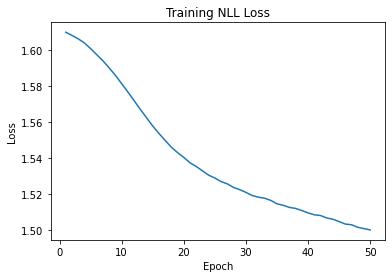

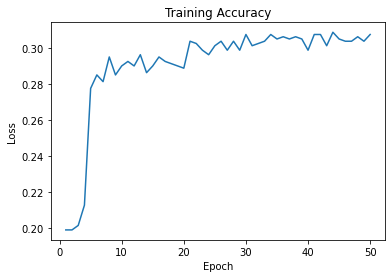

model 2
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  7.  7.  0.  1.  0.  0.  0.  2.]
 [ 3.  4.  0.  3.  0.  2.  3.  0.  0.  8.]
 [ 0.  0.  3.  0.  0.  3.  0.  1.  0.  1.]
 [ 0.  0.  0.  0. 16.  0.  0.  7.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 29.  0.]]
Factor Vae metric: 
Accuracy: 0.63
Beta Vae metric: 
Epoch 0 finished, loss: 1.60826565772295, accuracy:0.21625
Epoch 1 finished, loss: 1.6067653000354767, accuracy:0.21625
Epoch 2 finished, loss: 1.6057001516222953, accuracy:0.21625
Epoch 3 finished, loss: 1.604631318151951, accuracy:0.21625
Epoch 4 finished, loss: 1.603379726409912, accuracy:0.21625
Epoch 5 finished, loss: 1.602167709171772, accuracy:0.2175
Epoch 6 finished, loss: 1.6007260054349899, accuracy:0.2175
Epoch 7 finished, loss: 1.5992886781692506, accuracy:0.22375
Epoch 8 finished, loss: 1.5973192974925041, accuracy:0.225
Epoch 9 finished, loss: 1.595374359190464, accuracy:0.2325
Epoch 10 finished, loss: 1.593120063841343, accuracy:0.235
Epoch 11 finished, los

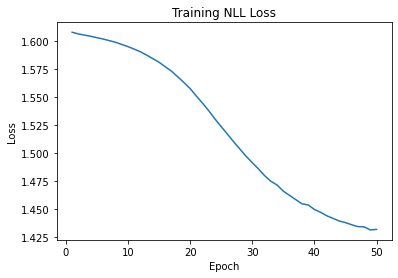

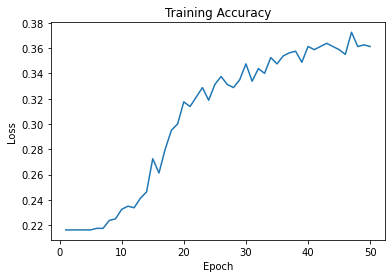

model 3
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  2.  0.  0.  2.  0.  4.  3.]
 [ 0.  1.  2.  6.  2.  2.  3.  5.  3.  0.]
 [ 1.  2.  0.  5.  0.  0.  5.  0.  6.  6.]
 [ 3.  8.  0.  0.  0.  0.  0.  0.  0. 11.]
 [ 4.  6.  0.  0.  0.  0.  5.  0.  1.  0.]]
Factor Vae metric: 
Accuracy: 0.32999999999999996
Beta Vae metric: 
Epoch 0 finished, loss: 1.6094952806830407, accuracy:0.2275
Epoch 1 finished, loss: 1.6086649999022484, accuracy:0.2275
Epoch 2 finished, loss: 1.6080436736345292, accuracy:0.2275
Epoch 3 finished, loss: 1.6074380546808242, accuracy:0.2275
Epoch 4 finished, loss: 1.606505273282528, accuracy:0.2275
Epoch 5 finished, loss: 1.6055899813771248, accuracy:0.2275
Epoch 6 finished, loss: 1.60487340092659, accuracy:0.2275
Epoch 7 finished, loss: 1.6040292724967002, accuracy:0.2275
Epoch 8 finished, loss: 1.603467920422554, accuracy:0.2275
Epoch 9 finished, loss: 1.6026670724153518, accuracy:0.2275
Epoch 10 finished, loss: 1.6018683150410653, accuracy:0.2275
Epoch 11

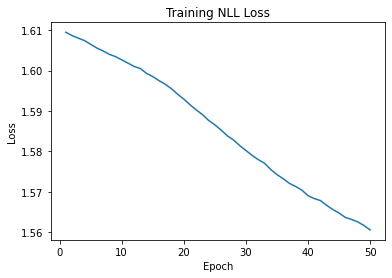

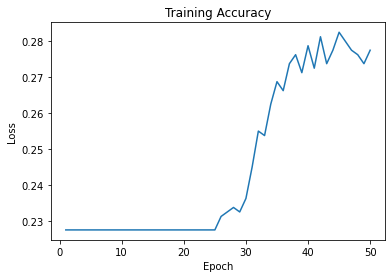

model 4
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [11.  0.  0.  0.  1. 10.  0.  0.  0.  0.]
 [ 0.  0.  3.  1.  1.  4.  6.  0.  1.  3.]
 [ 4.  0.  0.  1.  2. 14.  5.  0.  0.  2.]
 [ 0.  0.  0.  3.  0.  0.  8.  0.  0.  0.]
 [ 0.  0.  0.  2.  0.  0.  0. 18.  0.  0.]]
Factor Vae metric: 
Accuracy: 0.5700000000000001
Beta Vae metric: 


In [ ]:
models = [model1, model2, model3, model4, model5]
i=1
for model in models:
    print("model "+str(i))
    loss = entanglement_metric_factor_vae(model, data_, 100, 1000)
    print("Factor Vae metric: ")
    print("Accuracy: "+str(1-loss))
    print("Beta Vae metric: ")
    classifier = Classifier()
    optimizer = torch.optim.Adam(classifier.parameters(), lr=1e-4)
    losses, accuracies = entanglement_metric_beta_vae(model, classifier, optimizer, 50,  data_, 1000, 10)
    plot_loss(losses, "NLL Loss")
    plot_loss(accuracies, "Accuracy")
    i+=1

In [10]:
print(data_.factors_names)

(b'color', b'shape', b'scale', b'orientation', b'posX', b'posY')


In [38]:
imgs = latent_transversal(model4,data_test[10][0].float(),-5,5,10,7)

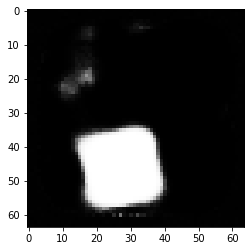

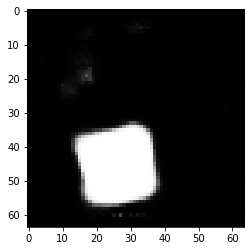

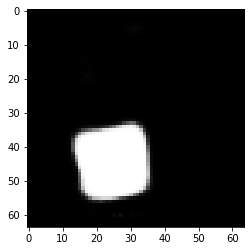

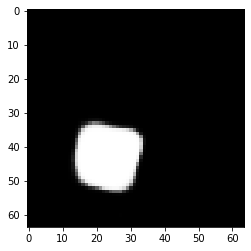

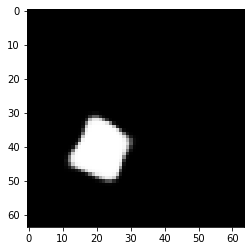

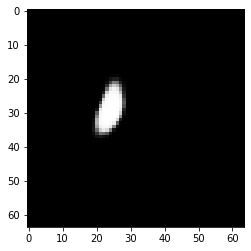

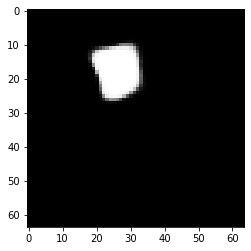

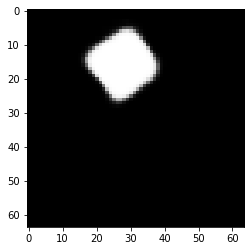

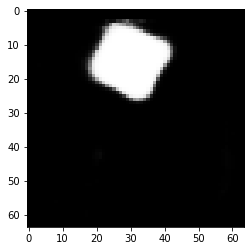

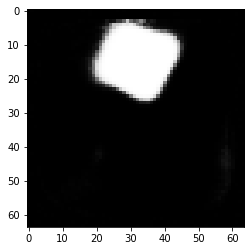

In [39]:
for img in imgs:
    plt.imshow(torch.sigmoid(img.squeeze().detach()), cmap='Greys_r')
    plt.title("")
    plt.show()